In [1]:
"""Optimizing threshold for private multiplicative weights
Author: Albert Sun 7/13/2021"""
from src.hdmm import workload, fairtemplates, error, fairmechanism, matrix, mechanism, templates
from implementations import pmw, pmw_optimized
import numpy as np

## Intialize Workloads


In [2]:
W_identity = workload.Identity(8).dense_matrix()
W_allrange = workload.AllRange(8).dense_matrix()
W_total = workload.Total(8).dense_matrix()

W_five_identity = np.vstack((W_identity, W_identity, W_identity, W_identity, W_identity))
W_sd = np.vstack((W_identity, W_allrange))
W_ds = np.vstack((W_allrange, W_identity))
W_sds = np.vstack((W_identity, W_allrange, W_identity))
W_dsd = np.vstack((W_allrange, W_identity, W_allrange))
W_random = np.random.permutation(W_sd)

## Initialize Databases


In [3]:
x_flat = np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720])
x_peaks = np.array([1000, 8000, 1300, 1250, 9000, 1450, 1700, 1720])

## Implementations

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3150.555288721226
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 1180.8986530664833
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1053.3658161864837
2 [0. 0. 1. 0. 0. 0. 0. 0.] 958.5943205632407
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1126.7866413749155
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1485.9176317850615
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1927.5370620786484
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1528.3494458125092
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1539.0062486631116
8 [1. 0. 0. 0. 0. 0. 0. 0.] 830.6696260573865
9 [0. 1. 0. 0. 0. 0. 0. 0.] 1104.2491318144534
10 [0. 0. 1. 0. 0. 0. 0. 0.] 1342.1686358400184
11 [0. 0. 0. 1. 0. 0. 0. 0.] 1337.769497806207
12 [0. 0. 0. 0. 1. 0. 0. 0.] 1502.1369770404485
13 [0. 0. 0. 0. 0. 1. 0. 0.] 939.1187026944265
14 [0. 0. 0. 0. 0. 0. 1. 0.] 1747.487811748289
15 [0. 0. 0. 0. 0. 0. 0. 1.] 1495.6945448680963
16 [1. 0. 0. 0. 0. 0. 0. 0.] 1013.0264272376133
17 [0. 1. 0. 0. 0. 0. 0. 0.] 1621.2519117037384
18 [0. 0. 1. 0. 0. 0. 0. 0.]

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

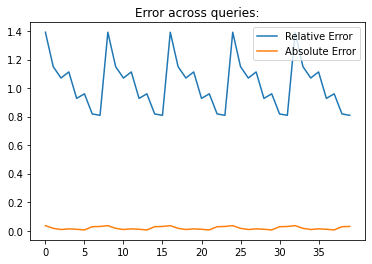

In [4]:
pmw(W_five_identity, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2249.1248382364483
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 1122.4827383363915
1 [0. 1. 0. 0. 0. 0. 0. 0.] 8216.428319311772
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1196.9040854692175
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1125.2007230600307
4 [0. 0. 0. 0. 1. 0. 0. 0.] 8876.520686224478
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1544.017437574222
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1769.75854450178
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1612.9641055516038
8 [1. 0. 0. 0. 0. 0. 0. 0.] 1095.4615127820025
9 [0. 1. 0. 0. 0. 0. 0. 0.] 7992.80361709786
10 [0. 0. 1. 0. 0. 0. 0. 0.] 1305.496349105809
11 [0. 0. 0. 1. 0. 0. 0. 0.] 1357.530158081914
12 [0. 0. 0. 0. 1. 0. 0. 0.] 9083.314264469313
13 [0. 0. 0. 0. 0. 1. 0. 0.] 1633.8919983218984
14 [0. 0. 0. 0. 0. 0. 1. 0.] 1836.4839254031297
15 [0. 0. 0. 0. 0. 0. 0. 1.] 2120.9763500333584
16 [1. 0. 0. 0. 0. 0. 0. 0.] 999.2174172450397
17 [0. 1. 0. 0. 0. 0. 0. 0.] 8041.022819157882
18 [0. 0. 1. 0. 0. 0. 0. 0.] 1368.

[0.125,
 0.32323183789582105,
 0.12511735240139552,
 0.12511735240139552,
 0.3491992841690354,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.3144346149615183,
 0.12535183478939738,
 0.12535183478939738,
 0.3573343302803088,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.3163314875007779,
 0.12558542837542097,
 0.12558542837542097,
 0.3609690901452504,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.3143722031648383,
 0.12581813161544736,
 0.12581813161544736,
 0.33668434266791625,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.3069224910823483,
 0.1260499430275195,
 0.1260499430275195,
 0.3532586831550484,
 0.12616573125473568,
 0.12616573125473568,
 0.12616573125473568]

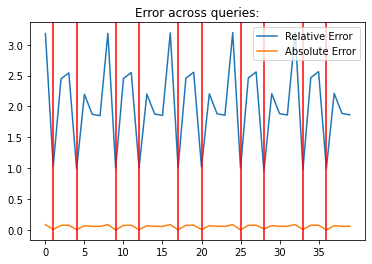

In [5]:
pmw(W_five_identity, x_peaks)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 3200.67325048008
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 1045.1768755179671
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1203.103680818928
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1344.0597208317522
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1368.259792257488
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1198.1387380312508
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1184.9625950987343
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1685.3698038993182
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1793.7321701778476
8 [1. 0. 0. 0. 0. 0. 0. 0.] 1062.3730361809905
9 [1. 1. 0. 0. 0. 0. 0. 0.] 2067.956704184367
10 [1. 1. 1. 0. 0. 0. 0. 0.] 3453.3270735712417
11 [1. 1. 1. 1. 0. 0. 0. 0.] 4661.9458758323235
12 [1. 1. 1. 1. 1. 0. 0. 0.] 6297.57388075429
13 [1. 1. 1. 1. 1. 1. 0. 0.] 7518.4003055451885
14 [1. 1. 1. 1. 1. 1. 1. 0.] 9039.767134404237
15 [1. 1. 1. 1. 1. 1. 1. 1.] 11138.196649295782
16 [0. 1. 0. 0. 0. 0. 0. 0.] 1207.9299648883518
17 [0. 1. 1. 0. 0. 0. 0. 0.] 2247.2932949915976
18 [0. 1. 1. 1. 0. 0. 0. 0.] 3

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.3103056669875329,
 0.4189077937701513,
 0.5658755748665009,
 0.6755746657028853,
 0.8122766319924073,
 1.000826293737267,
 0.12233378082243251,
 0.24466756164486503,
 0.32080267789193395,
 0.43657355927482905,
 0.5910617837197721,
 0.7333243460560003,
 0.9177358083066421,
 0.1197013639549449,
 0.2407730170851838,
 0.3402499679454551,
 0.49338693657771776,
 0.6417312838857238,
 0.7782887564394035,
 0.11863714756700357,
 0.24000605512415343,
 0.3677535010792518,
 0.5295087497894959,
 0.6826362786195801,
 0.11928892225237193,
 0.24272162390075602,
 0.41968480803829983,
 0.5464010940652303,
 0.12186103352396782,
 0.24939866587700177,
 0.4316702234047117,
 0.12664515632254536,
 0.2997740146568842,
 0.13293686641262076]

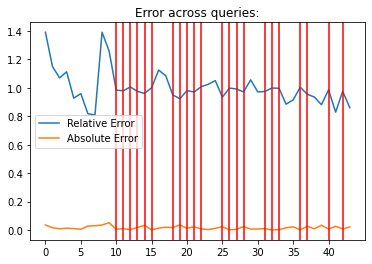

In [6]:
pmw(W_sd, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
T (Threshold) = 2284.9031510428154
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 1001.8653417870581
1 [0. 1. 0. 0. 0. 0. 0. 0.] 8023.169991974427
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1264.8760951476543
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1257.4068180014535
4 [0. 0. 0. 0. 1. 0. 0. 0.] 9116.226804405049
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1397.361225011411
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1710.5150838473608
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1843.7582819983913
8 [1. 0. 0. 0. 0. 0. 0. 0.] 713.6573225722022
9 [1. 1. 0. 0. 0. 0. 0. 0.] 9160.115723050034
10 [1. 1. 1. 0. 0. 0. 0. 0.] 10357.513275602372
11 [1. 1. 1. 1. 0. 0. 0. 0.] 11632.042881101523
12 [1. 1. 1. 1. 1. 0. 0. 0.] 20526.10439381212
13 [1. 1. 1. 1. 1. 1. 0. 0.] 21909.43289255358
14 [1. 1. 1. 1. 1. 1. 1. 0.] 23577.773040455926
15 [1. 1. 1. 1. 1. 1. 1. 1.] 25395.970385644545
16 [0. 1. 0. 0. 0. 0. 0. 0.] 8014.386620544706
17 [0. 1. 1. 0. 0. 0. 0. 0.] 9281.486447434425
18 [0. 1. 1. 1. 0. 0. 0. 0.] 10

[0.125,
 0.315629228637861,
 0.12511735240139552,
 0.12511735240139552,
 0.35862910785827895,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.3603605528402566,
 0.40746997906456695,
 0.45761371105296406,
 0.8075029705477373,
 0.8619267947093788,
 0.9275627631966995,
 0.9990940356272441,
 0.3152835745477396,
 0.36513498407774525,
 0.41357864221928525,
 0.7607677346571682,
 0.827727841711557,
 0.8962121711905912,
 0.9626323453978521,
 0.1213499967894642,
 0.10320322927425661,
 0.45712012523417683,
 0.5155738158311649,
 0.5833349296437212,
 0.6484739476466836,
 0.12087090541189958,
 0.401962356491163,
 0.46033897138008234,
 0.528643548477493,
 0.5928323229202049,
 0.3666372809543306,
 0.4110651976371144,
 0.4652555724624222,
 0.5464798969935313,
 0.12361096377591026,
 0.1232644661718734,
 0.19675605361232576,
 0.12704142211575856,
 0.1356937764705249,
 0.13217472045029702]

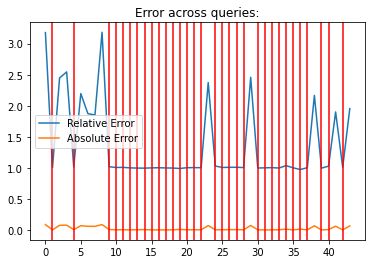

In [7]:
pmw(W_sd, x_peaks)

So far, it is clear that the algorithm updates more when 
- answering dense (all-range) than sparse (identity) workloads,
- flat than uneven dataframes.

The next question we need to think about is what to initialize the threshold and level of laplace noise to add. 

7/16 Questions - what do we initialize laplace_scale and threshold to be? How do I use epsilon and beta for this new instance? Do we want to be changing the d_t_hat threshold or the threshold for the max amount of updates - let's start playing with the query threshold because d_t_hat threshold honestly seems pretty reasonable.

# optimized

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8731741690394
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8724638136493
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.881983661967
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1249.9041593207105
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1499.8704068097973
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1449.8666145238935
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1699.8690939415173
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1719.889089627037
8 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8766177194136
9 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8771879621067
10 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.8441418458929
11 [0. 0. 0. 1. 0. 0. 0. 0.] 1249.8756228569182
12 [0. 0. 0. 0. 1. 0. 0. 0.] 1499.877047339289
13 [0. 0. 0. 0. 0. 1. 0. 0.] 1449.8695237024997
14 [0. 0. 0. 0. 0. 0. 1. 0.] 1699.8719174450214
15 [0. 0. 0. 0. 0. 0. 0. 1.] 1719.8800063471858
16 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8748494930929
17 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8621113670597
18 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.86623631

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

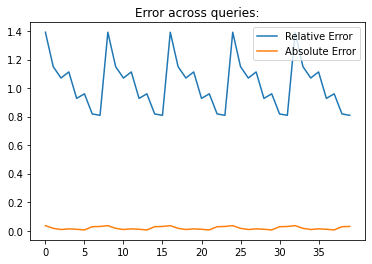

In [10]:
pmw_optimized(W_five_identity, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.866862374282
1 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8771696522424
2 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.874382530001
3 [0. 0. 0. 1. 0. 0. 0. 0.] 1249.878231722687
4 [0. 0. 0. 0. 1. 0. 0. 0.] 1499.8760279449584
5 [0. 0. 0. 0. 0. 1. 0. 0.] 1449.8782098300287
6 [0. 0. 0. 0. 0. 0. 1. 0.] 1699.873088043074
7 [0. 0. 0. 0. 0. 0. 0. 1.] 1719.8990615241014
8 [1. 0. 0. 0. 0. 0. 0. 0.] 999.8471958662169
9 [1. 1. 0. 0. 0. 0. 0. 0.] 2209.750411106466
10 [1. 1. 1. 0. 0. 0. 0. 0.] 3509.622325064894
11 [1. 1. 1. 1. 0. 0. 0. 0.] 4759.503490247948
12 [1. 1. 1. 1. 1. 0. 0. 0.] 6259.361714258873
13 [1. 1. 1. 1. 1. 1. 0. 0.] 7709.240643568786
14 [1. 1. 1. 1. 1. 1. 1. 0.] 9409.146433017177
15 [1. 1. 1. 1. 1. 1. 1. 1.] 11129.002357156545
16 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.872731481094
17 [0. 1. 1. 0. 0. 0. 0. 0.] 2509.7577755799302
18 [0. 1. 1. 1. 0. 0. 0. 0.] 3759.673905963724
19

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.375,
 0.5,
 0.5624426517752805,
 0.6927213712967129,
 0.8454644624716772,
 1.000000211784056,
 0.12392785245611689,
 0.24785570491223377,
 0.37178355736835067,
 0.4725968403219176,
 0.6028753063544245,
 0.7556152793862947,
 0.9101530286977277,
 0.12214676380591444,
 0.24429352761182888,
 0.3664402914177433,
 0.4941605421288669,
 0.6469032919572222,
 0.8014353350818233,
 0.12056036460164193,
 0.24112072920328387,
 0.36445713813143166,
 0.5300990128762922,
 0.684636017549407,
 0.11934702288181961,
 0.24144215146862086,
 0.36777853958429163,
 0.5723268143619833,
 0.12140025988812382,
 0.2470176414175233,
 0.37848660207996776,
 0.1256173815293995,
 0.2570863421918439,
 0.13146896066244443]

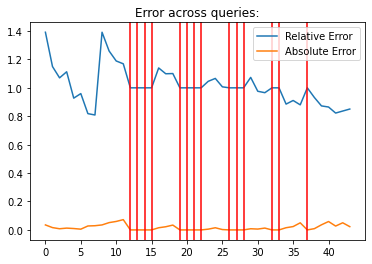

In [11]:
pmw_optimized(W_sd, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.879406712694
1 [1. 1. 0. 0. 0. 0. 0. 0.] 2209.744786551445
2 [1. 1. 1. 0. 0. 0. 0. 0.] 3509.625937834357
3 [1. 1. 1. 1. 0. 0. 0. 0.] 4759.487326532713
4 [1. 1. 1. 1. 1. 0. 0. 0.] 6259.387944419297
5 [1. 1. 1. 1. 1. 1. 0. 0.] 7709.211872895379
6 [1. 1. 1. 1. 1. 1. 1. 0.] 9409.14086745018
7 [1. 1. 1. 1. 1. 1. 1. 1.] 11129.014347150864
8 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.9153419093534
9 [0. 1. 1. 0. 0. 0. 0. 0.] 2509.751823431337
10 [0. 1. 1. 1. 0. 0. 0. 0.] 3759.628375651199
11 [0. 1. 1. 1. 1. 0. 0. 0.] 5259.507135497199
12 [0. 1. 1. 1. 1. 1. 0. 0.] 6709.369704134711
13 [0. 1. 1. 1. 1. 1. 1. 0.] 8409.276002617371
14 [0. 1. 1. 1. 1. 1. 1. 1.] 10129.14571069257
15 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.8723903453938
16 [0. 0. 1. 1. 0. 0. 0. 0.] 2549.773287574669
17 [0. 0. 1. 1. 1. 0. 0. 0.] 4049.6296690522736
18 [0. 0. 1. 1. 1. 1. 0. 0.] 5499.488610738764
19 [0

[0.125,
 0.25,
 0.375,
 0.5,
 0.5624450084833151,
 0.6927187863305487,
 0.8454639624207341,
 1.000001289052189,
 0.12392785245611689,
 0.24785570491223377,
 0.37178355736835067,
 0.4725968415909275,
 0.6028740902096607,
 0.7556173073138331,
 0.910154459815164,
 0.12214676380591444,
 0.24429352761182888,
 0.3664402914177433,
 0.4941581321084477,
 0.646902243877525,
 0.8014392730959531,
 0.12056036460164193,
 0.24112072920328387,
 0.36445713813143166,
 0.5300991189381052,
 0.6846354820089432,
 0.11934702288181961,
 0.24144215146862086,
 0.36777853958429163,
 0.5723254151324277,
 0.12140025988812382,
 0.2470176414175233,
 0.37848660207996776,
 0.1256173815293995,
 0.2570863421918439,
 0.13146896066244443,
 0.13297396016897228,
 0.127055394701942,
 0.12278999728547871,
 0.12002625154098727,
 0.11866779422265196,
 0.12140025988812382,
 0.1256173815293995,
 0.13146896066244443]

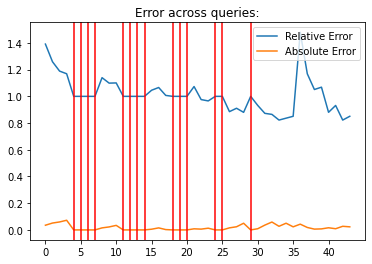

In [12]:
pmw_optimized(W_ds, x_flat, laplace_scale=0.01, threshold=5000)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
T (Threshold) = 5000
Index 	 Workload 	 d_t_hat:
0 [1. 0. 0. 0. 0. 0. 0. 0.] 999.864792348074
1 [1. 1. 0. 0. 0. 0. 0. 0.] 2209.7652713244875
2 [1. 1. 1. 0. 0. 0. 0. 0.] 3509.6319415867324
3 [1. 1. 1. 1. 0. 0. 0. 0.] 4759.498261208059
4 [1. 1. 1. 1. 1. 0. 0. 0.] 6259.379487413113
5 [1. 1. 1. 1. 1. 1. 0. 0.] 7709.24223076296
6 [1. 1. 1. 1. 1. 1. 1. 0.] 9409.113663798104
7 [1. 1. 1. 1. 1. 1. 1. 1.] 11129.023832949695
8 [0. 1. 0. 0. 0. 0. 0. 0.] 1209.8770005012143
9 [0. 1. 1. 0. 0. 0. 0. 0.] 2509.7550194114247
10 [0. 1. 1. 1. 0. 0. 0. 0.] 3759.6178298310297
11 [0. 1. 1. 1. 1. 0. 0. 0.] 5259.514234054843
12 [0. 1. 1. 1. 1. 1. 0. 0.] 6709.391675496449
13 [0. 1. 1. 1. 1. 1. 1. 0.] 8409.269590257254
14 [0. 1. 1. 1. 1. 1. 1. 1.] 10129.120870860534
15 [0. 0. 1. 0. 0. 0. 0. 0.] 1299.895778919844
16 [0. 0. 1. 1. 0. 0. 0. 0.] 2549.7466032808766
17 [0. 0. 1. 1. 1. 0. 0. 0.] 4049.6352367783848
18 [0. 0. 1. 1. 1. 1. 0. 0.] 5499.502591377792


[0.125,
 0.25,
 0.375,
 0.5,
 0.5624442486444845,
 0.69272151390176,
 0.8454615182471423,
 1.0000021413252196,
 0.12392785245611689,
 0.24785570491223377,
 0.37178355736835067,
 0.47259747937687935,
 0.6028760642763038,
 0.7556167311808487,
 0.910152228024325,
 0.12214676380591444,
 0.24429352761182888,
 0.3664402914177433,
 0.49415938823055267,
 0.6469005083160584,
 0.8014367842147043,
 0.12056036460164193,
 0.24112072920328387,
 0.36445713813143166,
 0.5300983651653286,
 0.6846322717805207,
 0.11934702288181961,
 0.24144215146862086,
 0.36777853958429163,
 0.5723274816249051,
 0.12140025988812382,
 0.2470176414175233,
 0.37848660207996776,
 0.1256173815293995,
 0.2570863421918439,
 0.13146896066244443,
 0.13297396016897228,
 0.127055394701942,
 0.12278999728547871,
 0.12002625154098727,
 0.11866779422265196,
 0.12140025988812382,
 0.1256173815293995,
 0.13146896066244443,
 0.13297396016897228,
 0.2600293548709143,
 0.382819352156393,
 0.5028456036973803,
 0.562446984549704,
 0.692718

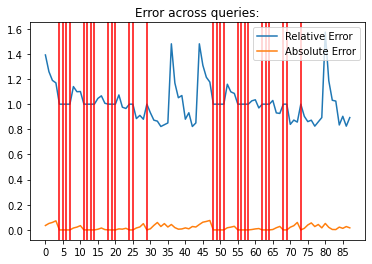

In [14]:
pmw_optimized(np.vstack((W_ds, W_ds)), x_flat, laplace_scale=0.01, threshold=5000)